In [86]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.DataFrame(columns=['Saida','Tempo','n','Algoritmo'])

lista_program = ['./main','./random_local_search/main']
lista_programs=[]
for i in lista_program:
    lista_=[]
    for j in range(1,197):
        f = open(f'inputs_generator/in{j}.txt',"r")
        contents = f.read()
        f.close()
        n = contents.split()[0]
        m = contents.split()[1]
        start = time.perf_counter()
        proc = subprocess.run([i], input=contents, text=True, capture_output=True)
        end = time.perf_counter()
#             print('Saída:', proc.stdout)
        print("value", proc.stdout.split()[-1])
        print('Stderr:', proc.stderr)
        print('Tempo total(s):', end - start)
        dic = {
            'Tempo':float(end-start),
            'Saida':int(proc.stdout.split()[-1]),
            'n': int(n),
            'm': int(m)
        }
        lista_.append(dic)
    lista_programs.append(lista_)

value 6
Stderr: 
Tempo total(s): 0.02239018200089049
value 6
Stderr: 
Tempo total(s): 0.01648675800061028
value 2
Stderr: 
Tempo total(s): 0.014381347000380629
value 6
Stderr: 
Tempo total(s): 0.01435383599891793
value 8
Stderr: 
Tempo total(s): 0.014697189999424154
value 7
Stderr: 
Tempo total(s): 0.01449450400104979
value 8
Stderr: 
Tempo total(s): 0.014325598000141326
value 9
Stderr: 
Tempo total(s): 0.014610798001740477
value 10
Stderr: 
Tempo total(s): 0.014114782999968156
value 11
Stderr: 
Tempo total(s): 0.014818440000453847
value 11
Stderr: 
Tempo total(s): 0.014884621999954106
value 16
Stderr: 
Tempo total(s): 0.014552664999428089
value 14
Stderr: 
Tempo total(s): 0.016097290001198417
value 13
Stderr: 
Tempo total(s): 0.016085025999927893
value 13
Stderr: 
Tempo total(s): 0.01738185800059
value 16
Stderr: 
Tempo total(s): 0.014806581999437185
value 16
Stderr: 
Tempo total(s): 0.0147145509999973
value 12
Stderr: 
Tempo total(s): 0.015557141001409036
value 19
Stderr: 
Tempo tota

value 110
Stderr: 
Tempo total(s): 0.02380446499955724
value 106
Stderr: 
Tempo total(s): 0.0221779779985809
value 111
Stderr: 
Tempo total(s): 0.024686266000571777
value 106
Stderr: 
Tempo total(s): 0.019536132000212092
value 108
Stderr: 
Tempo total(s): 0.025179965999996057
value 111
Stderr: 
Tempo total(s): 0.025222815000233823
value 111
Stderr: 
Tempo total(s): 0.023930035000375938
value 98
Stderr: 
Tempo total(s): 0.016660273000525194
value 114
Stderr: 
Tempo total(s): 0.01910042600138695
value 110
Stderr: 
Tempo total(s): 0.024635650001073373
value 121
Stderr: 
Tempo total(s): 0.023053559998515993
value 110
Stderr: 
Tempo total(s): 0.02085021799939568
value 116
Stderr: 
Tempo total(s): 0.016826610000862274
value 102
Stderr: 
Tempo total(s): 0.01721189500131004
value 113
Stderr: 
Tempo total(s): 0.02325226799985103
value 111
Stderr: 
Tempo total(s): 0.025261487000534544
value 113
Stderr: 
Tempo total(s): 0.019176395999238594
value 118
Stderr: 
Tempo total(s): 0.020847902000241447


value 13
Stderr: 
Tempo total(s): 0.05531564599914418
value 13
Stderr: 
Tempo total(s): 0.06297318399992946
value 10
Stderr: 
Tempo total(s): 0.041892367000400554
value 10
Stderr: 
Tempo total(s): 0.02978638999957184
value 12
Stderr: 
Tempo total(s): 0.06107680499917478
value 15
Stderr: 
Tempo total(s): 0.034770446000038646
value 12
Stderr: 
Tempo total(s): 0.07116222500008007
value 7
Stderr: 
Tempo total(s): 0.0416440250010055
value 7
Stderr: 
Tempo total(s): 0.032191890000831336
value 6
Stderr: 
Tempo total(s): 0.021273936001307447
value 10
Stderr: 
Tempo total(s): 0.024302821000674157
value 11
Stderr: 
Tempo total(s): 0.03271291700002621
value 10
Stderr: 
Tempo total(s): 0.07209790500019153
value 9
Stderr: 
Tempo total(s): 0.0512430350008799
value 10
Stderr: 
Tempo total(s): 0.05890714800079877
value 12
Stderr: 
Tempo total(s): 0.053031031999125844
value 9
Stderr: 
Tempo total(s): 0.04205335900041973
value 8
Stderr: 
Tempo total(s): 0.04366974900040077
value 11
Stderr: 
Tempo total(

In [87]:
for i in range(len(lista_programs)):
    for j in lista_programs[i]:
        if i == 0:
            alg = 'Smith'
        else:
            alg = 'Random Search'
        j['Algoritmo'] = alg
        df = df.append(j, ignore_index = True);

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_6442/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [88]:
df

,Saida,Tempo,n,Algoritmo,m
0,6,0.02239,4,Smith,9.0
1,6,0.016487,5,Smith,18.0
2,2,0.014381,6,Smith,11.0
3,6,0.014354,7,Smith,7.0
4,8,0.014697,8,Smith,40.0
...,...,...,...,...,...
387,11,0.127553,195,Random Search,811.0
388,12,0.089033,196,Random Search,556.0
389,13,0.143525,197,Random Search,845.0
390,13,0.083474,198,Random Search,513.0


In [89]:
df= df.apply(pd.to_numeric,errors="ignore")

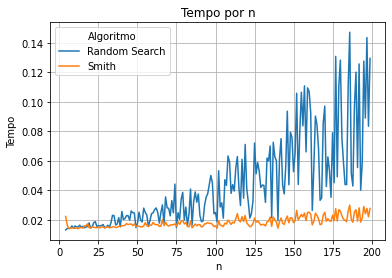

In [90]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

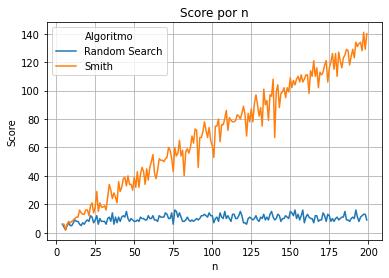

In [91]:
# df = df.loc[df['n']<100]
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");
# for i in np.arange(0,len(df),5):
#     plt.annotate(str(df.iloc[i]["m"]),xy=(df.iloc[i]["n"],df.iloc[i]["Tempo"]))




### Analisando variações no tempo do algoritmo smith

In [92]:
def plot_corr(x_,y_,title):
    sns.regplot(x_,y_, color=('#a29bec'))
    plt.title(title)
    plt.grid(True)
    plt.show()

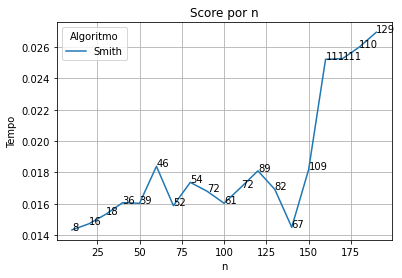

In [93]:
df_teste = df.loc[(df['n']<500) & (df['Algoritmo']== 'Smith') & (df['n']%10 == 0) ]

df_teste.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Tempo");
for i in np.arange(0,len(df_teste),1):
    plt.annotate(str(df_teste.iloc[i]["Saida"]),xy=(df_teste.iloc[i]["n"],df_teste.iloc[i]["Tempo"]))

### Correlação da diferença |n-m| e o tempo

In [94]:
df['|n-m|'] = ((df['n'] - df['m'])**2)**(1/2)

In [95]:
df['|n-m|']

0        5.0
1       13.0
2        5.0
3        0.0
4       32.0
       ...  
387    616.0
388    360.0
389    648.0
390    315.0
391    532.0
Name: |n-m|, Length: 392, dtype: float64

In [ ]:
plot_corr('|n-m|'')

In [81]:
df['Tempo'].corr(df['|n-m|'])

0.6477989158093013